# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets  # FutureWarning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
from dtreeviz.trees import dtreeviz
from sklearn import tree

import graphviz
import dtreeviz

%matplotlib inline

In [2]:
# Lendo o arquivo CSV
data_url = 'C:/Users/Paulo Roberto/Downloads/Exercício 1 módulo 11/BostonHousing.csv'
raw_df = pd.read_csv(data_url, skiprows=1, names=[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

# Visualizando as primeiras linhas do DataFrame para garantir que a leitura foi correta
print(raw_df.head())

# Verificando se há valores ausentes
print(raw_df.isna().sum())

# Salvando o DataFrame limpo
raw_df.to_csv(path_or_buf='boston_clean_data.csv', index=False)

# Dividindo os dados em variáveis independentes (X) e dependentes (y)
X = raw_df.drop(columns='MEDV')
y = raw_df['MEDV']

# Verificando as dimensões dos dados
print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

raw_df

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
Quantidade de linhas e colunas de X: (506, 13)
Quantidade de linhas de y: 506


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [4]:
y.to_frame()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [5]:
# Verificação das variáveis. 
# Scikit-learn não aceita variáveis string nem missing.

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

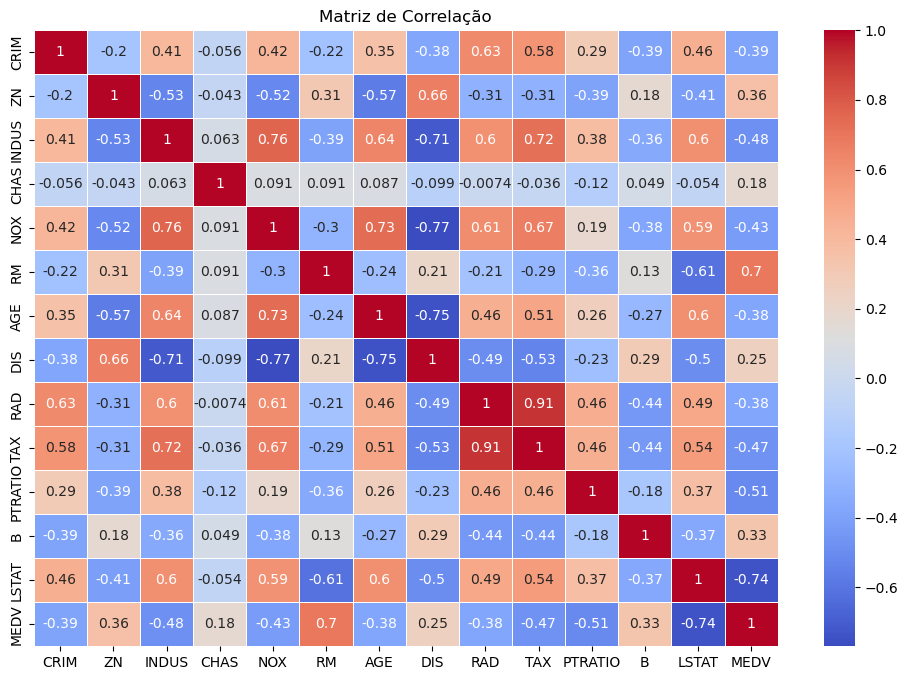

In [6]:
# Calculando a matriz de correlação
correlation_matrix = raw_df.corr()

# Visualizando a matriz de correlação usando um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


##### A matriz de correlação revelou que o número de quartos (RM) tem uma forte correlação positiva com o valor das casas (MEDV), enquanto a porcentagem de população de status inferior (LSTAT) apresenta uma forte correlação negativa com MEDV. INDUS e NOX estão positivamente correlacionados, indicando possíveis preocupações ambientais. A acessibilidade às rodovias (RAD) mostrou alta correlação positiva com as taxas de imposto (TAX). Esses insights são valiosos para modelagem preditiva e planejamento urbano.

### 3. Separe os dados em validação e teste

In [7]:
# Dividindo os dados em treino (80%), validação (10%) e teste (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verificando as dimensões dos dados
print('Treino:', X_train.shape, y_train.shape)
print('Validação:', X_val.shape, y_val.shape)
print('Teste:', X_test.shape, y_test.shape)

Treino: (404, 13) (404,)
Validação: (51, 13) (51,)
Teste: (51, 13) (51,)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [8]:
# Árvore com profundidade máxima 8
tree_max_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max_8.fit(X_train, y_train)

# Árvore com profundidade máxima 2
tree_max_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_max_2.fit(X_train, y_train)

# Fazendo previsões nos dados de validação
predictions_8 = tree_max_8.predict(X_val)
predictions_2 = tree_max_2.predict(X_val)

# Calculando o erro quadrático médio
mse_8 = mean_squared_error(y_val, predictions_8)
mse_2 = mean_squared_error(y_val, predictions_2)

print(f'Erro Quadrático Médio com profundidade 8: {mse_8}')
print(f'Erro Quadrático Médio com profundidade 2: {mse_2}')

Erro Quadrático Médio com profundidade 8: 8.314108352501052
Erro Quadrático Médio com profundidade 2: 33.90928881943031


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [9]:
# Fazendo previsões na base de treinamento
train_predictions_8 = tree_max_8.predict(X_train)
train_predictions_2 = tree_max_2.predict(X_train)

# Fazendo previsões na base de teste
test_predictions_8 = tree_max_8.predict(X_test)
test_predictions_2 = tree_max_2.predict(X_test)

# Calculando o MSE para a base de treinamento
mse_train_8 = mean_squared_error(y_train, train_predictions_8)
mse_train_2 = mean_squared_error(y_train, train_predictions_2)

# Calculando o MSE para a base de teste
mse_test_8 = mean_squared_error(y_test, test_predictions_8)
mse_test_2 = mean_squared_error(y_test, test_predictions_2)

print(f'Erro Quadrático Médio na base de treinamento com profundidade 8: {mse_train_8}')
print(f'Erro Quadrático Médio na base de treinamento com profundidade 2: {mse_train_2}')
print(f'Erro Quadrático Médio na base de teste com profundidade 8: {mse_test_8}')
print(f'Erro Quadrático Médio na base de teste com profundidade 2: {mse_test_2}')


Erro Quadrático Médio na base de treinamento com profundidade 8: 1.9490192185625448
Erro Quadrático Médio na base de treinamento com profundidade 2: 25.654637281631615
Erro Quadrático Médio na base de teste com profundidade 8: 9.642908871546481
Erro Quadrático Médio na base de teste com profundidade 2: 18.07709297251208


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [10]:
print(f'A árvore de decisão com profundidade máxima de 2 apresentou um MSE maior na base de treinamento ({mse_train_2:.4f}),\n'
      f'mas teve uma performance mais consistente na base de teste ({mse_test_2:.4f}), sugerindo melhor capacidade de generalização.\n'
      f'A árvore com profundidade máxima de 8, apesar de ter um MSE menor na base de treinamento,\n'
      f'indicou overfitting, com pior desempenho na base de teste.\n'
      f'Portanto, a árvore com profundidade 2 parece mais adequada para evitar overfitting e garantir melhor generalização.')


A árvore de decisão com profundidade máxima de 2 apresentou um MSE maior na base de treinamento (25.6546),
mas teve uma performance mais consistente na base de teste (18.0771), sugerindo melhor capacidade de generalização.
A árvore com profundidade máxima de 8, apesar de ter um MSE menor na base de treinamento,
indicou overfitting, com pior desempenho na base de teste.
Portanto, a árvore com profundidade 2 parece mais adequada para evitar overfitting e garantir melhor generalização.


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

### Visualizando a árvore de decisão.

Text(0.5, 1.0, 'Árvore de Decisão com Profundidade Máxima de 2')

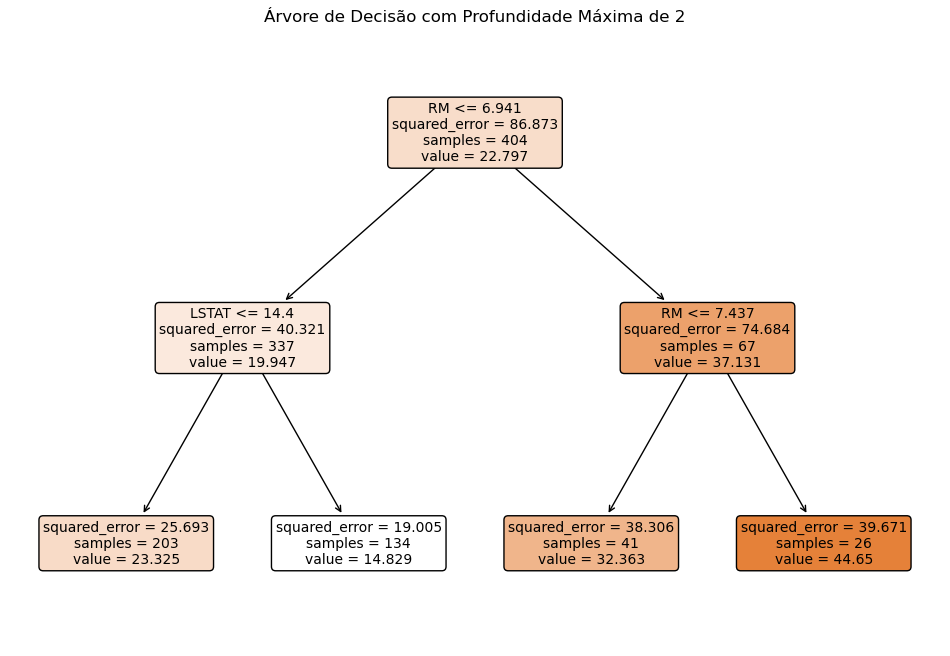

In [11]:
plt.figure(figsize=(12,8))
tree.plot_tree(tree_max_2, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title('Árvore de Decisão com Profundidade Máxima de 2')


### Gerando a representação textual da árvore de decisão.

In [12]:
text_tree_print = tree.export_text(decision_tree=tree_max_2, feature_names=X.columns)
print(text_tree_print)

|--- RM <= 6.94
|   |--- LSTAT <= 14.40
|   |   |--- value: [23.32]
|   |--- LSTAT >  14.40
|   |   |--- value: [14.83]
|--- RM >  6.94
|   |--- RM <= 7.44
|   |   |--- value: [32.36]
|   |--- RM >  7.44
|   |   |--- value: [44.65]



### Visualizar a árvore com graphviz & dtreeviz

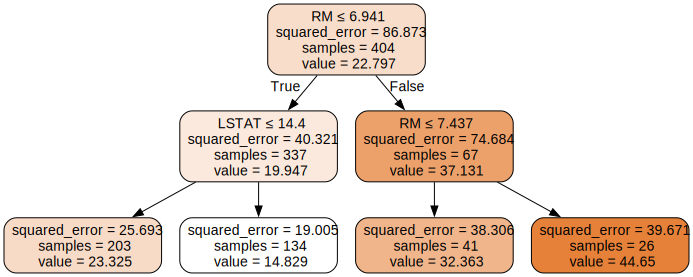

In [13]:
# Exportando a árvore para o formato DOT
dot_data = export_graphviz(tree_max_2, out_file=None, 
                           feature_names=X.columns, 
                           filled=True, rounded=True, 
                           special_characters=True)

# Criando um gráfico
graph = graphviz.Source(dot_data)

# Salvando a árvore como um arquivo PDF
graph.render("tree_max_2")

# Visualizando a árvore diretamente no notebook
graph.view()

# Mostrando a árvore no notebook
graph

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


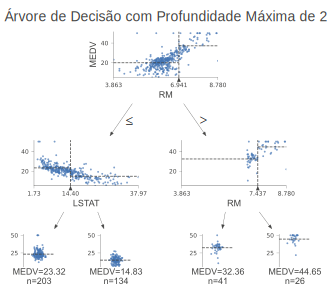

In [14]:
from dtreeviz.trees import dtreeviz

# Visualizando a árvore com dtreeviz
viz = dtreeviz(tree_max_2, 
               X_train, 
               y_train,
               target_name='MEDV',
               feature_names=X.columns.to_list(),  # Garantindo que feature_names é uma lista
               title="Árvore de Decisão com Profundidade Máxima de 2")

# Salvando a visualização da árvore
viz.save("dtreeviz_tree_max_2.svg")

# Mostrando a visualização da árvore no notebook
viz.view()

viz  # Mostrando a visualização diretamente no notebook


##### A variável mais importante, identificada na primeira divisão da árvore de decisão, é RM, que representa o número médio de quartos por habitação. Essa variável possivelmente apresenta o menor Erro Quadrático Médio (EQM), indicando uma forte capacidade preditiva no modelo.